In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import missingno as msno

In [2]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
1360,1360,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,4.0,2.0,1.0,18 - 34 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,2.0,0
17357,17357,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,1.0,1.0,55 - 64 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
18330,18330,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,"MSA, Principle City",2.0,0.0,0
16832,16832,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,65+ Years,12 Years,White,Female,NaN,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
7867,7867,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,35 - 44 Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA,0.0,2.0,0
13070,13070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2.0,1.0,1.0,1.0,1.0,45 - 54 Years,< 12 Years,Hispanic,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
10348,10348,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,5.0,2.0,2.0,1.0,5.0,18 - 34 Years,12 Years,Hispanic,Male,Below Poverty,Married,Own,Unemployed,Non-MSA,1.0,3.0,0
11517,11517,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,4.0,1.0,2.0,1.0,65+ Years,12 Years,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
18781,18781,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,5.0,1.0,1.0,5.0,1.0,55 - 64 Years,12 Years,Black,Male,NaN,Married,Own,Employed,"MSA, Principle City",1.0,0.0,0
19998,19998,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,1.0,5.0,4.0,1.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
df['has_health_insur'] = df['has_health_insur'].replace(np.NaN,0)

In [8]:
df.drop('unique_id',inplace = True,axis = 1)

In [9]:
df.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
has_health_insur                0
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

# VISUALIZTIONS OF MISSINGS VALUES


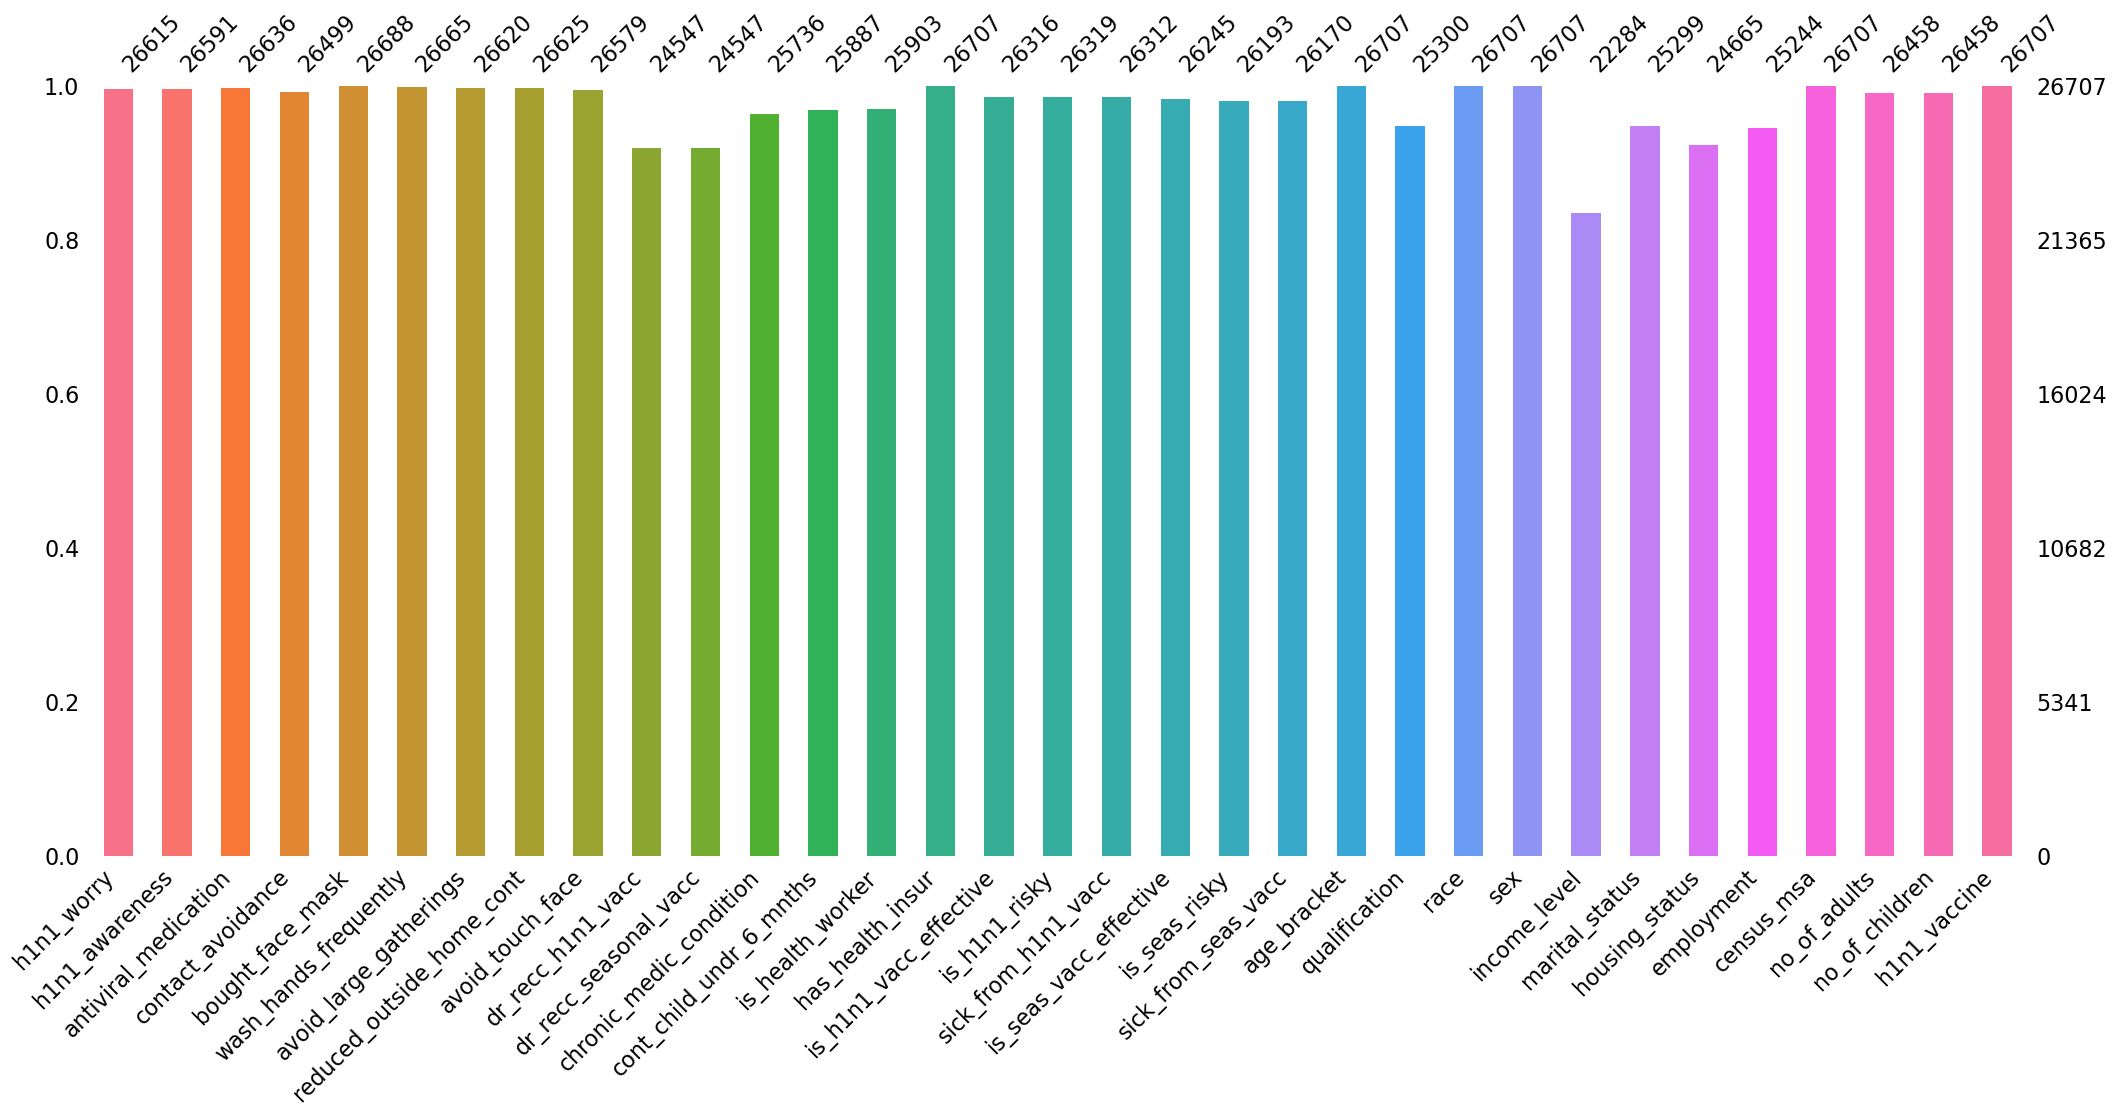

<Figure size 1200x800 with 0 Axes>

In [10]:

color_palette = sns.color_palette("husl", len(df.columns))

msno.bar(df, color=color_palette)


plt.figure(figsize=(12, 8))
plt.tight_layout()


plt.show()


## The values in the heatmap range between -1 and 1. A value of -1 indicates a negative correspondence: A missing value in feature A implies that there is not a missing value in feature B.

<Axes: >

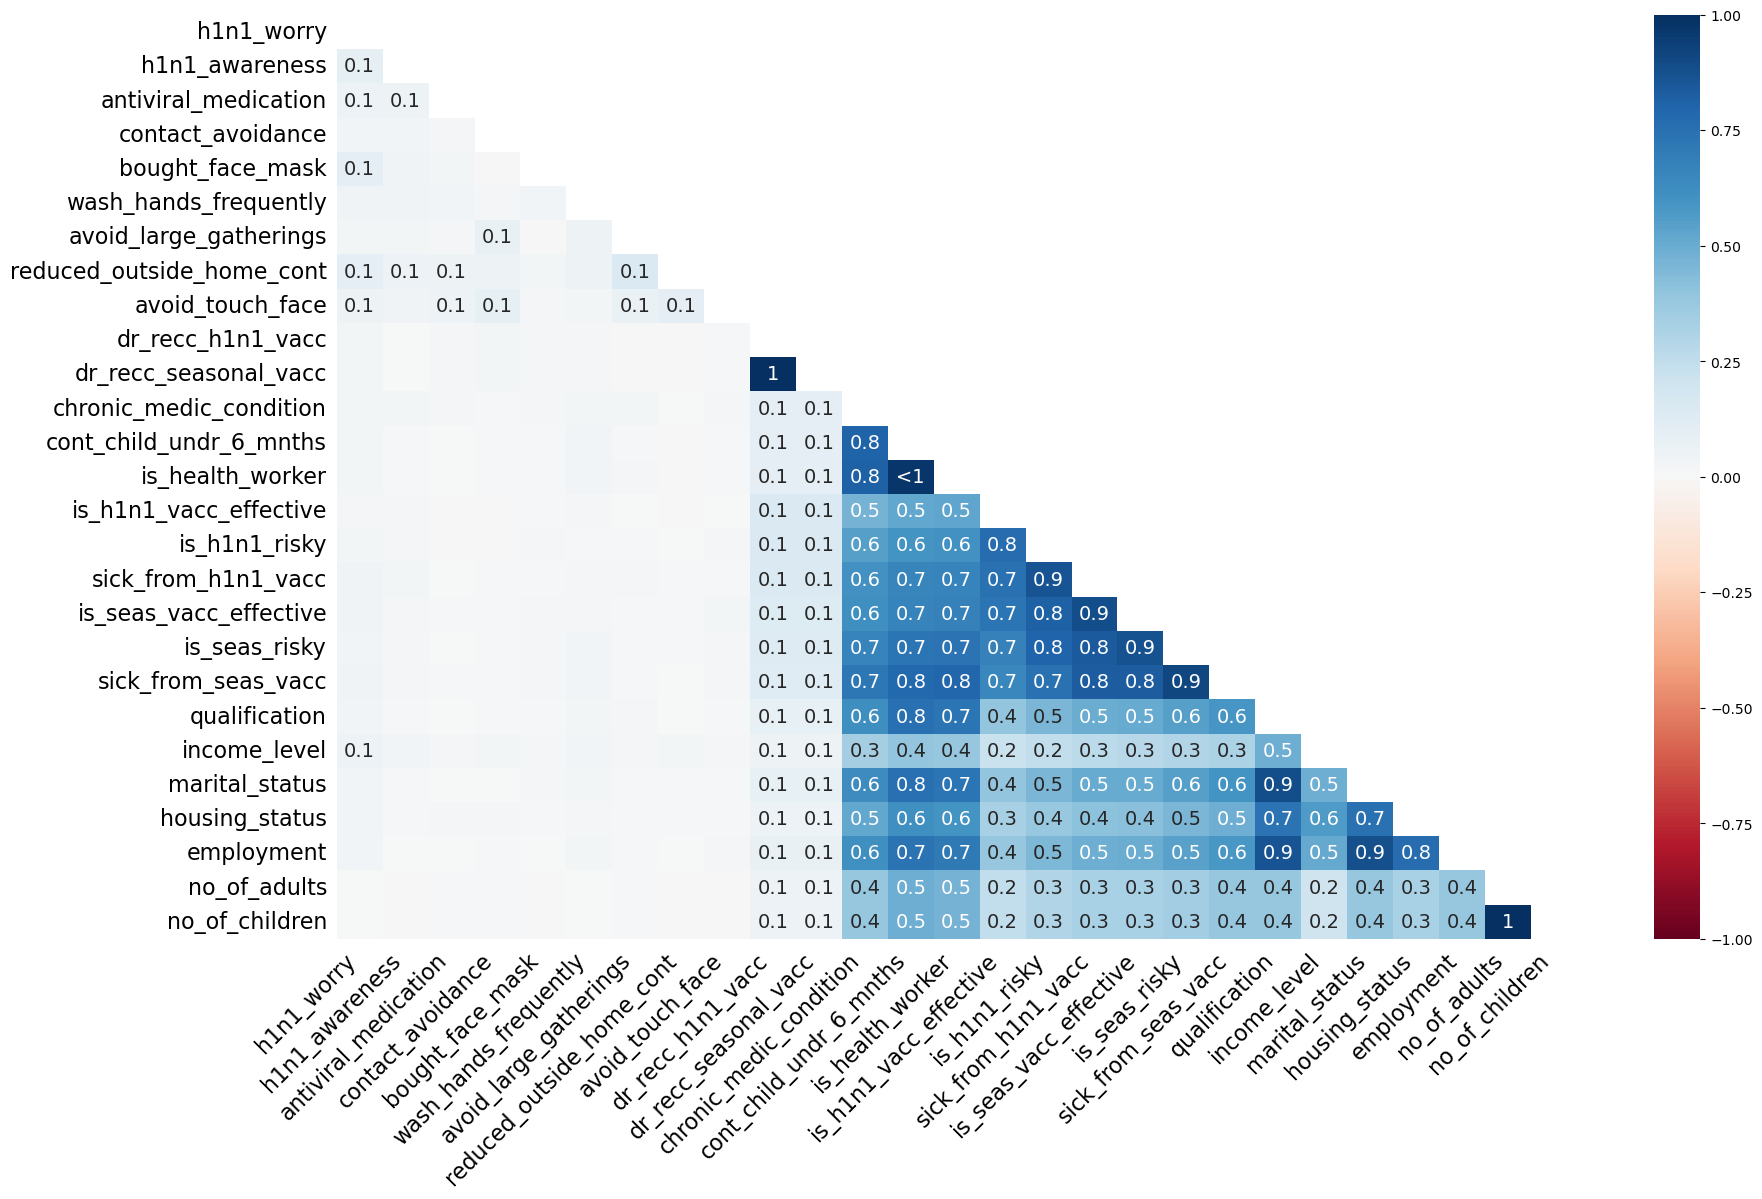

In [11]:
msno.heatmap(df)

Index(['index', 'missing'], dtype='object')


<Axes: xlabel='missing', ylabel='index'>

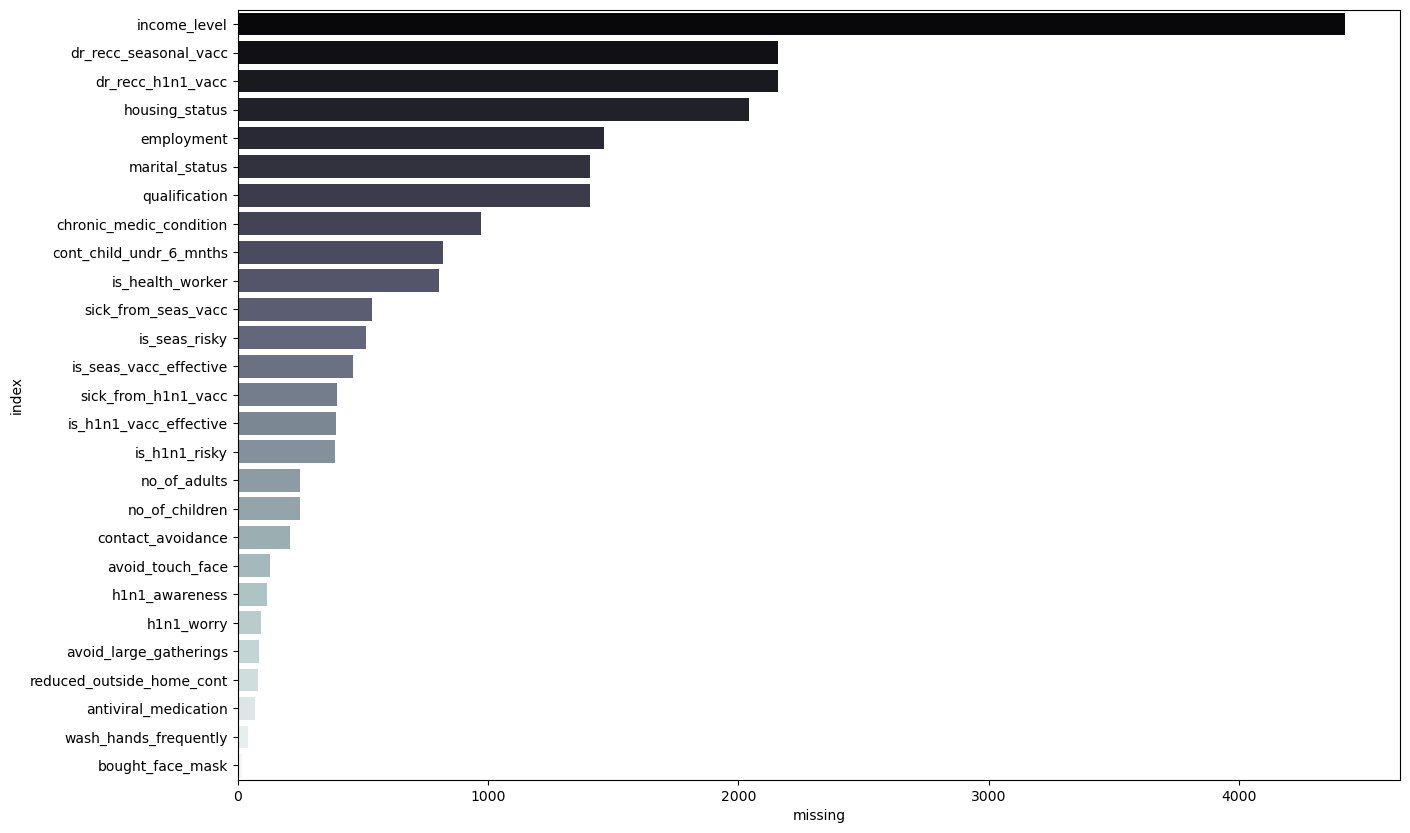

In [12]:
missing = df.isnull().sum()
missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()

print(miss.columns)

miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='bone')

# DATA PREPROCESSING


In [13]:
df['h1n1_worry'] = df['h1n1_worry'].replace(np.NaN,df.h1n1_worry.median())

In [14]:
df['h1n1_awareness'] = df['h1n1_awareness'].replace(np.NaN,df.h1n1_awareness.median())

In [15]:
df['antiviral_medication'] = df['antiviral_medication'].replace(np.NaN,df.antiviral_medication.median())

In [16]:
df['contact_avoidance'] = df['contact_avoidance'].replace(np.NaN,df.contact_avoidance.median())

In [17]:
df['bought_face_mask'] = df['bought_face_mask'].replace(np.NaN,df.bought_face_mask.median())

In [18]:
df['wash_hands_frequently'] = df['wash_hands_frequently'].replace(np.NaN,df.wash_hands_frequently.median())

In [19]:
df['avoid_large_gatherings'] = df['avoid_large_gatherings'].replace(np.NaN,df.avoid_large_gatherings.median())

In [20]:
df['reduced_outside_home_cont'] = df['reduced_outside_home_cont'].replace(np.NaN,df.reduced_outside_home_cont.median())

In [21]:
df['avoid_touch_face'] = df['avoid_touch_face'].replace(np.NaN,df.avoid_touch_face.median())

In [22]:
df['dr_recc_h1n1_vacc'] = df['dr_recc_h1n1_vacc'].replace(np.NaN,df.dr_recc_h1n1_vacc.median())

In [23]:
df['dr_recc_seasonal_vacc'] = df['dr_recc_seasonal_vacc'].replace(np.NaN,df.dr_recc_seasonal_vacc.median())

In [24]:
df['chronic_medic_condition'] = df['chronic_medic_condition'].replace(np.NaN,df.chronic_medic_condition.median())

In [25]:
df['cont_child_undr_6_mnths'] = df['cont_child_undr_6_mnths'].replace(np.NaN,df.cont_child_undr_6_mnths.median())

In [26]:
df['is_health_worker'] = df['is_health_worker'].replace(np.NaN,df.is_health_worker.median())

In [27]:
df['is_h1n1_vacc_effective'] = df['is_h1n1_vacc_effective'].replace(np.NaN,df.is_h1n1_vacc_effective.median())

In [28]:
df['is_h1n1_risky'] = df['is_h1n1_risky'].replace(np.NaN,df.is_h1n1_risky.median())

In [29]:
df['sick_from_h1n1_vacc'] = df['sick_from_h1n1_vacc'].replace(np.NaN,df.sick_from_h1n1_vacc.median())

In [30]:
df['is_seas_vacc_effective'] = df['is_seas_vacc_effective'].replace(np.NaN,df.is_seas_vacc_effective.median())

In [31]:
df['is_seas_risky'] = df['is_seas_risky'].replace(np.NaN,df.is_seas_risky.median())

In [32]:
df['sick_from_seas_vacc'] = df['sick_from_seas_vacc'].replace(np.NaN,df.sick_from_seas_vacc.median())

In [33]:
df['no_of_children'] = df['no_of_children'].replace(np.NaN,df.no_of_children.median())

In [34]:
df['no_of_adults'] = df['no_of_adults'].replace(np.NaN,df.no_of_adults.median())

In [35]:
df['qualification'] = df['qualification'].replace(np.NaN,df.qualification.mode()[0])

In [36]:
df['income_level'] = df['income_level'].replace(np.NaN,df.income_level.mode()[0])

In [37]:
df['marital_status'] = df['marital_status'].replace(np.NaN,df.marital_status.mode()[0])

In [38]:
df['housing_status'] = df['housing_status'].replace(np.NaN,df.housing_status.mode()[0])

In [39]:
df['employment'] = df['employment'].replace(np.NaN,df.employment.mode()[0])

In [40]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [41]:
df['h1n1_worry']

0        1.0
1        3.0
2        1.0
3        1.0
4        2.0
5        3.0
6        0.0
7        1.0
8        0.0
9        2.0
10       2.0
11       1.0
12       1.0
13       1.0
14       3.0
15       1.0
16       2.0
17       1.0
18       1.0
19       2.0
20       3.0
21       2.0
22       1.0
23       3.0
24       0.0
25       1.0
26       3.0
27       3.0
28       0.0
29       2.0
30       3.0
31       2.0
32       2.0
33       2.0
34       1.0
35       2.0
36       2.0
37       1.0
38       1.0
39       2.0
40       0.0
41       2.0
42       0.0
43       2.0
44       2.0
45       2.0
46       1.0
47       0.0
48       3.0
49       1.0
50       2.0
51       0.0
52       1.0
53       1.0
54       1.0
55       1.0
56       2.0
57       3.0
58       2.0
59       3.0
60       3.0
61       3.0
62       2.0
63       2.0
64       1.0
65       1.0
66       2.0
67       2.0
68       1.0
69       1.0
70       2.0
71       3.0
72       1.0
73       3.0
74       2.0
75       3.0
76       2.0

In [42]:
df.shape

(26707, 33)

# VISUALIZATIONS

## UNIVARIATE ANALYSIS

In [43]:
numeric_col=[feature for feature in df if df[feature].dtype!='O']
numeric_col

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

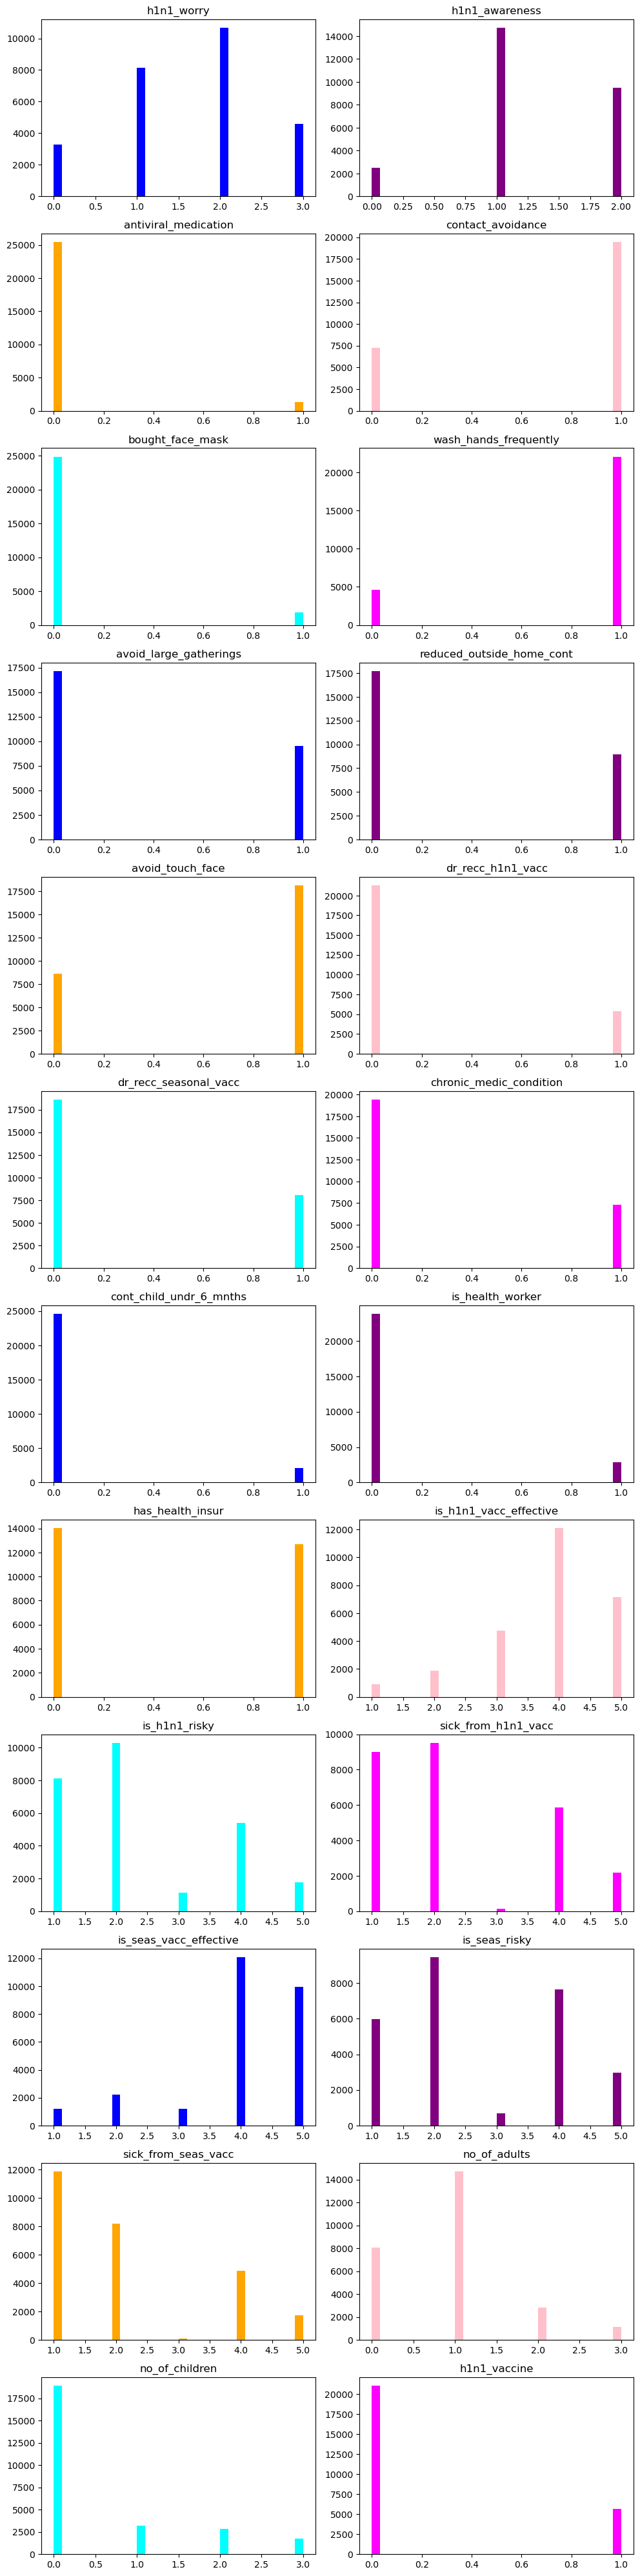

In [44]:
import itertools

plt.figure(figsize=(10, 40))
color_palette = itertools.cycle(['blue', 'purple', 'orange', 'pink', 'cyan', 'magenta'])
num_cols = len(numeric_col)
num_rows = (num_cols + 1) // 2

for i, col in enumerate(numeric_col):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(df[col], bins=30, color=next(color_palette))
    plt.title(col)

plt.tight_layout(pad=1.0)
plt.show()


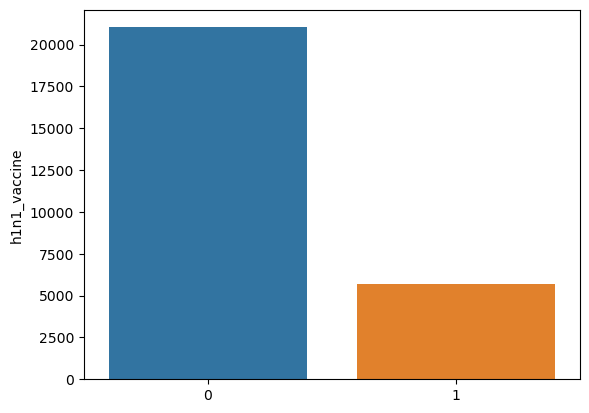

In [45]:
h1n1_vaccine_counts = df['h1n1_vaccine'].value_counts()

sns.barplot(x=h1n1_vaccine_counts.index, y=h1n1_vaccine_counts)
plt.show()

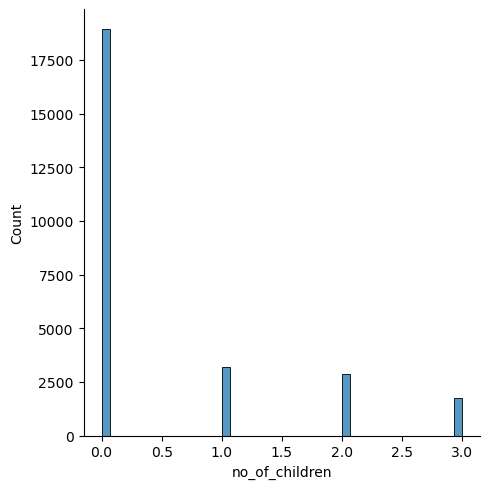

In [46]:
sns.displot(df.no_of_children)

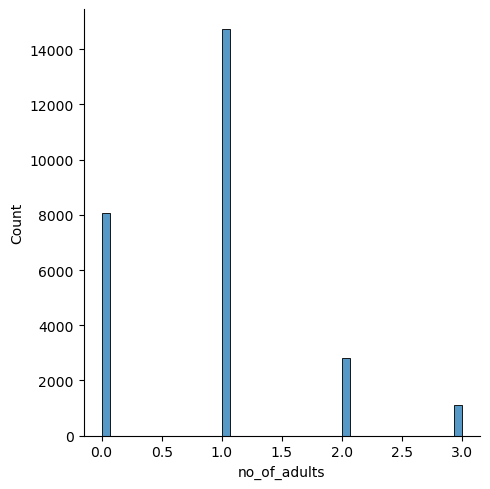

In [47]:
sns.displot(df.no_of_adults)

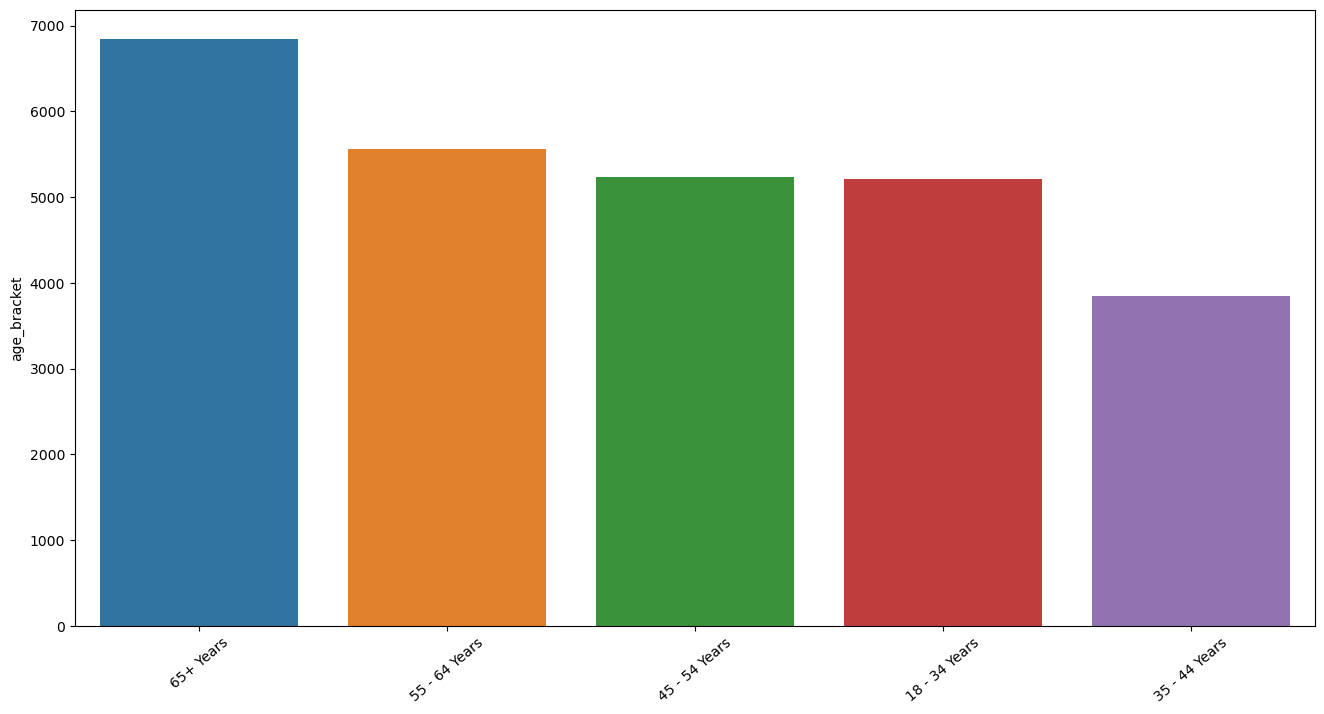

In [48]:
top_20_locations = df['age_bracket'].value_counts()[:20]
plt.figure(figsize=(16,8))
sns.barplot(x=top_20_locations.index, y=top_20_locations)
plt.xticks(rotation=40)
plt.show()

## MULTIVARIATE ANALYSIS

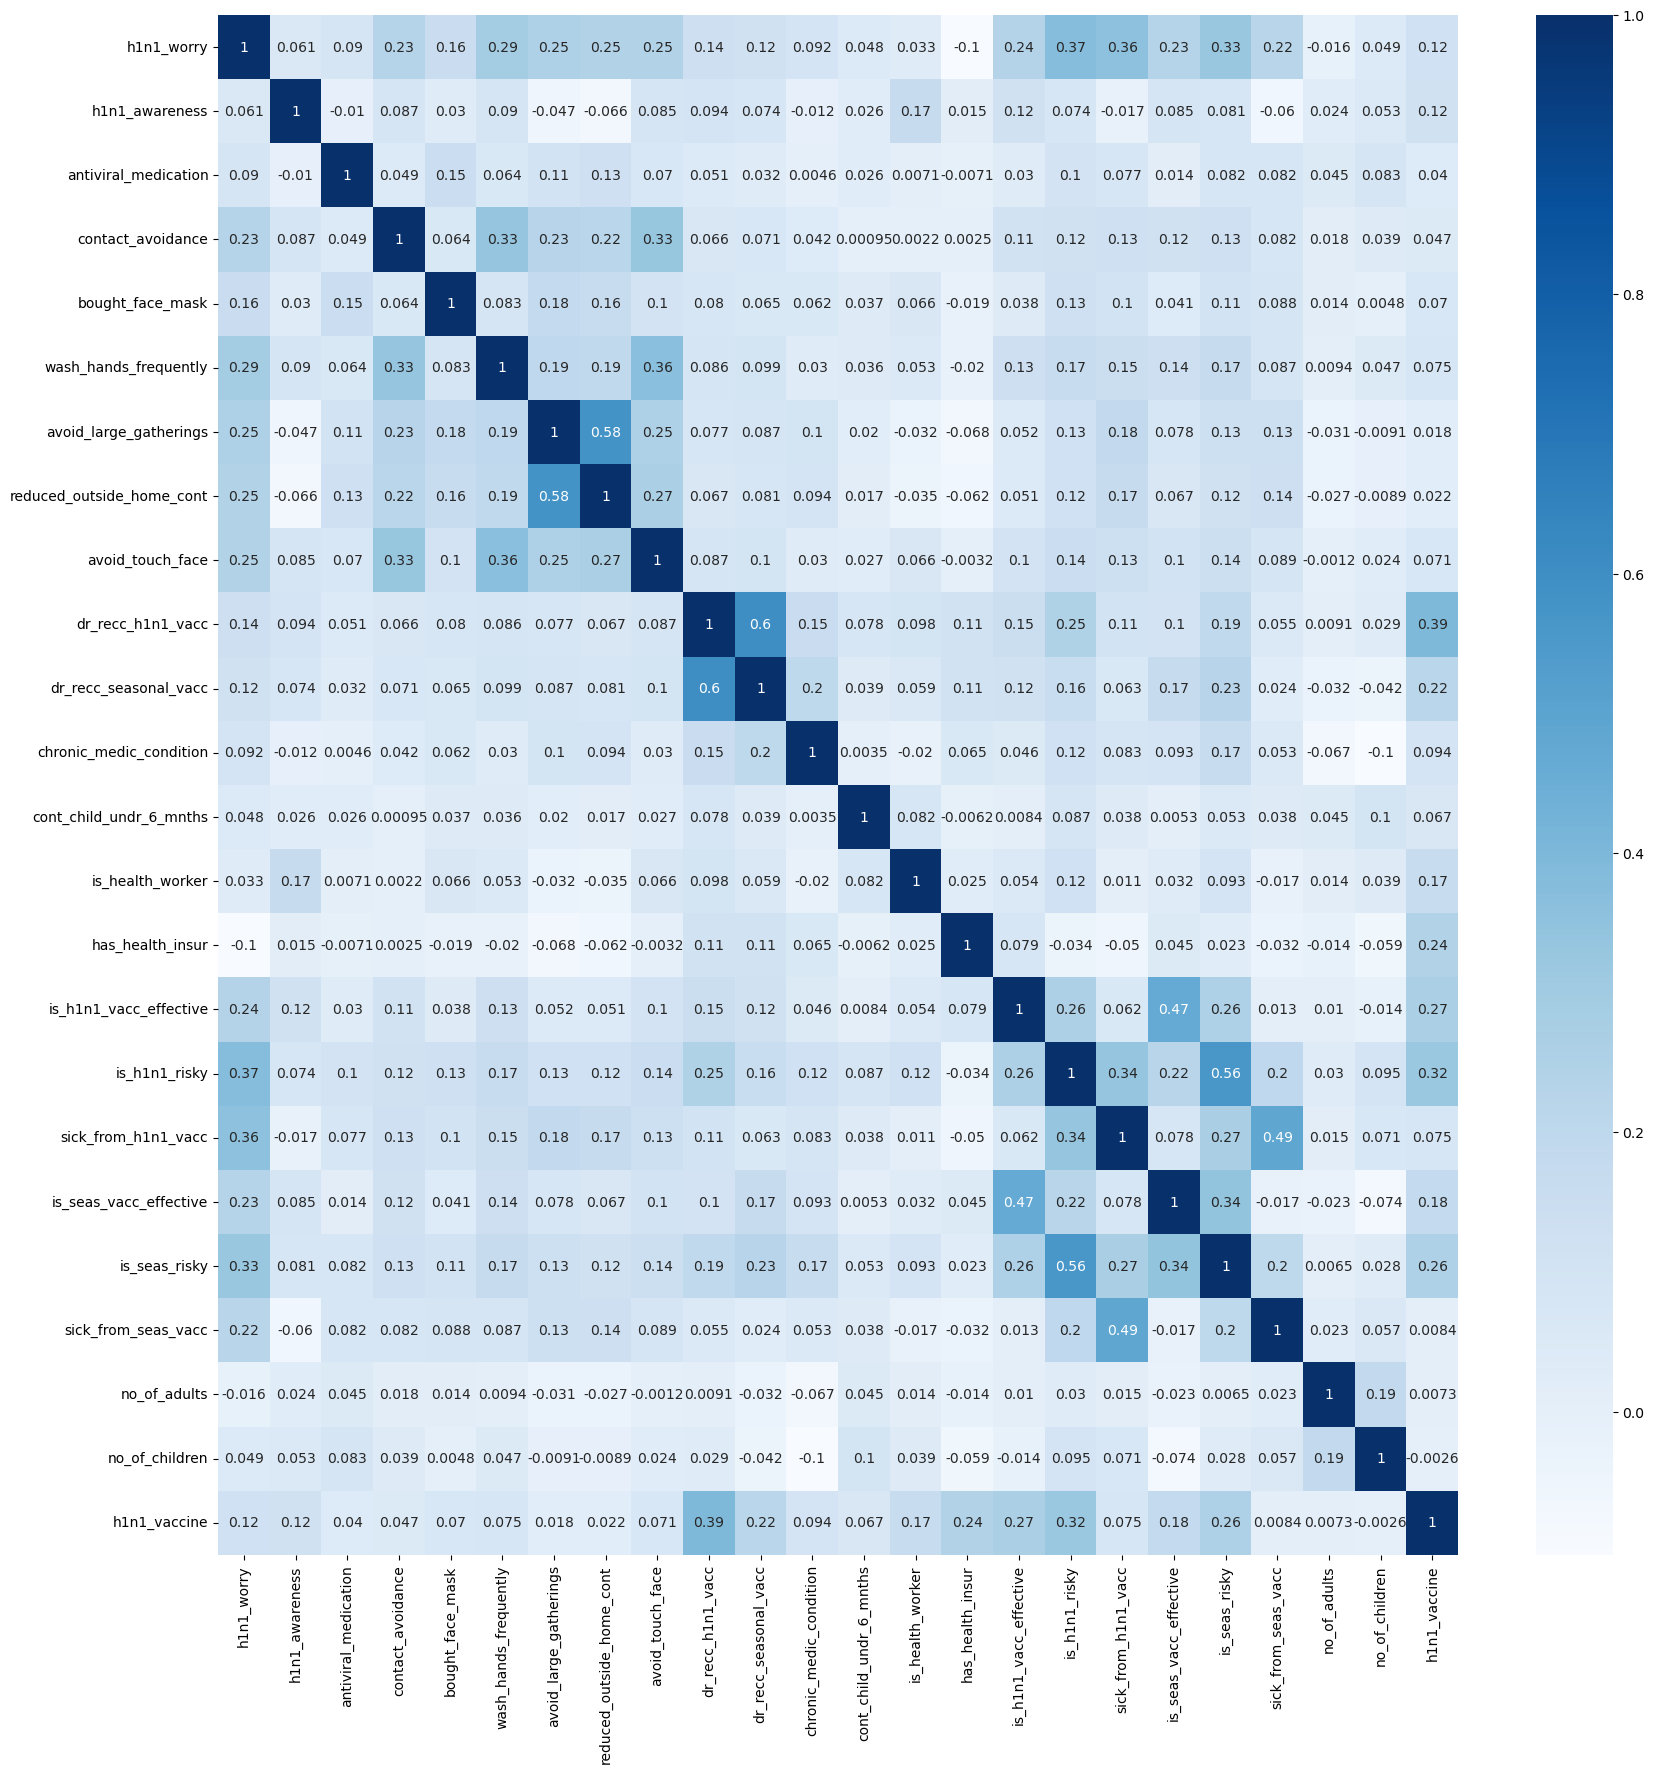

In [49]:
corrmat = df.corr()
top_corr_df = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_df].corr(),annot=True,cmap="Blues")

## MODEL BUILDING

In [50]:
df['h1n1_worry'] = df['h1n1_worry'].replace({0.0:'Not worried at all',1.0:'Not very worried',2.0:'Somewhat worried',3.0:'Veryworried'})


In [51]:
df = pd.get_dummies(df,columns = ['h1n1_worry'])

In [52]:
df['h1n1_awareness'] = df['h1n1_awareness'].replace({0.0:'No knowledge',1.0:'little knowledge',2.0:'good knowledge'})


In [53]:
df = pd.get_dummies(df,columns = ['h1n1_awareness'])

In [54]:
df['is_h1n1_vacc_effective'] = df['is_h1n1_vacc_effective'].replace({1.0:'Thinks not effective at all',2.0:'Thinks it is not very effective',3.0:'Doesnt know if it is effective or not',4.0:'Thinks it is somewhat effective',5.0:'Thinks it is highly effective'})


In [55]:
df = pd.get_dummies(df,columns = ['is_h1n1_vacc_effective'])

In [56]:
df['is_h1n1_risky'] = df['is_h1n1_risky'].replace({1.0:'Thinks it is not very low risk',2.0:'Thinks it is somewhat low risk',3.0:'don’t know if it is risky or not',4.0:'Thinks it is a somewhat high risk',5.0:'Thinks it is very highly risky'})


In [57]:
df = pd.get_dummies(df,columns = ['is_h1n1_risky'])

In [58]:
df['sick_from_h1n1_vacc'] = df['sick_from_h1n1_vacc'].replace({1.0:'Respondent not worried at all',2.0:'Respondent is not very worried',3.0:'Doesnt know',4.0:'Respondent is somewhat worried',5.0:'Respondent is very worried'})


In [59]:
df = pd.get_dummies(df,columns = ['sick_from_h1n1_vacc'])

In [60]:
df['is_seas_vacc_effective'] = df['is_seas_vacc_effective'].replace({1.0:'Thinks not effective at all',2.0:'Thinks it is not very effective',3.0:'Doesnt know if it is effective or not',4.0:'Thinks it is somewhat effective',5.0:'Thinks it is highly effective'})


In [61]:
df = pd.get_dummies(df,columns = ['is_seas_vacc_effective'])

In [62]:
df['is_seas_risky'] = df['is_seas_risky'].replace({1.0:'Thinks it is not very low risk',2.0:'Thinks it is somewhat low risk',3.0:'Doesnt know if it is risky or not',4.0:'Thinks it is somewhat high risk',5.0:'Thinks it is very highly risky'})


In [63]:
df = pd.get_dummies(df,columns = ['is_seas_risky'])

In [64]:
df['sick_from_seas_vacc'] = df['sick_from_seas_vacc'].replace({1.0:'Respondent not worried at all',2.0:'Respondent is not very worried',3.0:'Doesnt know',4.0:'Respondent is somewhat worried',5.0:'Respondent is very worried'})


In [65]:
df = pd.get_dummies(df,columns = ['sick_from_seas_vacc'])

In [66]:
df.sample(10)

,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,h1n1_worry_Not very worried,h1n1_worry_Not worried at all,h1n1_worry_Somewhat worried,h1n1_worry_Veryworried,h1n1_awareness_No knowledge,h1n1_awareness_good knowledge,h1n1_awareness_little knowledge,is_h1n1_vacc_effective_Doesnt know if it is effective or not,is_h1n1_vacc_effective_Thinks it is highly effective,is_h1n1_vacc_effective_Thinks it is not very effective,is_h1n1_vacc_effective_Thinks it is somewhat effective,is_h1n1_vacc_effective_Thinks not effective at all,is_h1n1_risky_Thinks it is a somewhat high risk,is_h1n1_risky_Thinks it is not very low risk,is_h1n1_risky_Thinks it is somewhat low risk,is_h1n1_risky_Thinks it is very highly risky,is_h1n1_risky_don’t know if it is risky or not,sick_from_h1n1_vacc_Doesnt know,sick_from_h1n1_vacc_Respondent is not very worried,sick_from_h1n1_vacc_Respondent is somewhat worried,sick_from_h1n1_vacc_Respondent is very worried,sick_from_h1n1_vacc_Respondent not worried at all,is_seas_vacc_effective_Doesnt know if it is effective or not,is_seas_vacc_effective_Thinks it is highly effective,is_seas_vacc_effective_Thinks it is not very effective,is_seas_vacc_effective_Thinks it is somewhat effective,is_seas_vacc_effective_Thinks not effective at all,is_seas_risky_Doesnt know if it is risky or not,is_seas_risky_Thinks it is not very low risk,is_seas_risky_Thinks it is somewhat high risk,is_seas_risky_Thinks it is somewhat low risk,is_seas_risky_Thinks it is very highly risky,sick_from_seas_vacc_Doesnt know,sick_from_seas_vacc_Respondent is not very worried,sick_from_seas_vacc_Respondent is somewhat worried,sick_from_seas_vacc_Respondent is very worried,sick_from_seas_vacc_Respondent not worried at all
26101,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,55 - 64 Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
8182,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
9005,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
21367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45 - 54 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
8423,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35 - 44 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
21558,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,2.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7024,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
24674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45 - 54 Years,< 12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,1.0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,

In [67]:
df.shape

(26707, 62)

In [68]:
df = pd.get_dummies(df,columns = ['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa'])

In [69]:
df.dtypes

antiviral_medication                                            float64
contact_avoidance                                               float64
bought_face_mask                                                float64
wash_hands_frequently                                           float64
avoid_large_gatherings                                          float64
reduced_outside_home_cont                                       float64
avoid_touch_face                                                float64
dr_recc_h1n1_vacc                                               float64
dr_recc_seasonal_vacc                                           float64
chronic_medic_condition                                         float64
cont_child_undr_6_mnths                                         float64
is_health_worker                                                float64
has_health_insur                                                float64
no_of_adults                                                    

In [70]:
df = pd.get_dummies(df,columns = ['no_of_children','no_of_adults','has_health_insur','is_health_worker','cont_child_undr_6_mnths','chronic_medic_condition','dr_recc_seasonal_vacc','dr_recc_h1n1_vacc','avoid_touch_face','wash_hands_frequently','bought_face_mask','contact_avoidance','antiviral_medication'])


In [71]:
df.shape

(26707, 98)

In [72]:
df.dtypes

avoid_large_gatherings                                          float64
reduced_outside_home_cont                                       float64
h1n1_vaccine                                                      int64
h1n1_worry_Not very worried                                       uint8
h1n1_worry_Not worried at all                                     uint8
h1n1_worry_Somewhat worried                                       uint8
h1n1_worry_Veryworried                                            uint8
h1n1_awareness_No knowledge                                       uint8
h1n1_awareness_good knowledge                                     uint8
h1n1_awareness_little knowledge                                   uint8
is_h1n1_vacc_effective_Doesnt know if it is effective or not      uint8
is_h1n1_vacc_effective_Thinks it is highly effective              uint8
is_h1n1_vacc_effective_Thinks it is not very effective            uint8
is_h1n1_vacc_effective_Thinks it is somewhat effective          

In [73]:
df = pd.get_dummies(df,columns = ['reduced_outside_home_cont','avoid_large_gatherings'])

In [74]:
df.dtypes

h1n1_vaccine                                                    int64
h1n1_worry_Not very worried                                     uint8
h1n1_worry_Not worried at all                                   uint8
h1n1_worry_Somewhat worried                                     uint8
h1n1_worry_Veryworried                                          uint8
h1n1_awareness_No knowledge                                     uint8
h1n1_awareness_good knowledge                                   uint8
h1n1_awareness_little knowledge                                 uint8
is_h1n1_vacc_effective_Doesnt know if it is effective or not    uint8
is_h1n1_vacc_effective_Thinks it is highly effective            uint8
is_h1n1_vacc_effective_Thinks it is not very effective          uint8
is_h1n1_vacc_effective_Thinks it is somewhat effective          uint8
is_h1n1_vacc_effective_Thinks not effective at all              uint8
is_h1n1_risky_Thinks it is a somewhat high risk                 uint8
is_h1n1_risky_Thinks

In [75]:
X = df.drop(['h1n1_vaccine'],axis=1)
y = df['h1n1_vaccine']

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

## LOGISTIC REGRESSION

In [77]:
model_1 = LogisticRegression(C=2.0,solver='saga')

In [78]:
model_1.fit(X_train,y_train)

LogisticRegression(C=2.0, solver='saga')

In [79]:
model_1.score(X_train,y_train)

0.8518776077885952

In [80]:
model_1.score(X_test,y_test)

0.8458754523898665

In [81]:
df.describe(include = 'all')

,h1n1_vaccine,h1n1_worry_Not very worried,h1n1_worry_Not worried at all,h1n1_worry_Somewhat worried,h1n1_worry_Veryworried,h1n1_awareness_No knowledge,h1n1_awareness_good knowledge,h1n1_awareness_little knowledge,is_h1n1_vacc_effective_Doesnt know if it is effective or not,is_h1n1_vacc_effective_Thinks it is highly effective,is_h1n1_vacc_effective_Thinks it is not very effective,is_h1n1_vacc_effective_Thinks it is somewhat effective,is_h1n1_vacc_effective_Thinks not effective at all,is_h1n1_risky_Thinks it is a somewhat high risk,is_h1n1_risky_Thinks it is not very low risk,is_h1n1_risky_Thinks it is somewhat low risk,is_h1n1_risky_Thinks it is very highly risky,is_h1n1_risky_don’t know if it is risky or not,sick_from_h1n1_vacc_Doesnt know,sick_from_h1n1_vacc_Respondent is not very worried,sick_from_h1n1_vacc_Respondent is somewhat worried,sick_from_h1n1_vacc_Respondent is very worried,sick_from_h1n1_vacc_Respondent not worried at all,is_seas_vacc_effective_Doesnt know if it is effective or not,is_seas_vacc_effective_Thinks it is highly effective,is_seas_vacc_effective_Thinks it is not very effective,is_seas_vacc_effective_Thinks it is somewhat effective,is_seas_vacc_effective_Thinks not effective at all,is_seas_risky_Doesnt know if it is risky or not,is_seas_risky_Thinks it is not very low risk,is_seas_risky_Thinks it is somewhat high risk,is_seas_risky_Thinks it is somewhat low risk,is_seas_risky_Thinks it is very highly risky,sick_from_seas_vacc_Doesnt know,sick_from_seas_vacc_Respondent is not very worried,sick_from_seas_vacc_Respondent is somewhat worried,sick_from_seas_vacc_Respondent is very worried,sick_from_seas_vacc_Respondent not worried at all,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_12 Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_level_<= $75,000, Above Poverty","income_level_> $75,000",income_level_Below Poverty,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,no_of_adults_0.0,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,has_health_insur_0.0,has_health_insur_1.0,is_health_worker_0.0,is_health_worker_1.0,cont_child_undr_6_mnths_0.0,cont_child_undr_6_mnths_1.0,chronic_medic_condition_0.0,chronic_medic_condition_1.0,dr_recc_seasonal_vacc_0.0,dr_recc_seasonal_vacc_1.0,dr_recc_h1n1_vacc_0.0,dr_recc_h1n1_vacc_1.0,avoid_touch_face_0.0,avoid_touch_face_1.0,wash_hands_frequently_0.0,wash_hands_frequently_1.0,bought_face_mask_0.0,bought_face_mask_1.0,contact_avoidance_0.0,contact_avoidance_1.0,antiviral_medication_0.0,antiviral_medication_1.0,reduced_outside_home_cont_0.0,reduced_outside_home_cont_1.0,avoid_large_gatherings_0.0,avoid_large_gatherings_1.0
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.00000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.

## SVC


In [82]:
from sklearn.svm import SVC

In [83]:
model_2 = SVC(kernel = 'rbf',C = 2.0)

In [84]:
model_2.fit(X_train,y_train)

SVC(C=2.0)

In [85]:
model_2.score(X_train,y_train)

0.8988445490531721

In [86]:
model_2.score(X_test,y_test)

0.8483713964807188

## KNEIGHBORS CLASSIFIER

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
model_3 = KNeighborsClassifier(n_neighbors = 7)

In [89]:
model_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
model_3.score(X_train,y_train)

0.8620947897721194

In [91]:
model_3.score(X_test,y_test)

0.8317733682765506

## DECISION TREE CLASSIFIER

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
model_4 = DecisionTreeClassifier(max_depth=9)

In [94]:
model_4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [95]:
model_4.score(X_train,y_train)

0.8775008023964909

In [96]:
model_4.score(X_test,y_test)

0.8292774241856983

## BAGGING CLASSIFIER

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
model_5 = BaggingClassifier(n_estimators=25,base_estimator=model_4)

In [99]:
model_5.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                  n_estimators=25)

In [100]:
model_5.score(X_train,y_train)

0.891622980635498

In [101]:
model_5.score(X_test,y_test)

0.846374641208037

In [102]:
from sklearn.ensemble import AdaBoostClassifier


In [103]:
model_6 = AdaBoostClassifier(n_estimators = 100)

In [104]:
model_6.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [105]:
model_6.score(X_train,y_train)

0.8512356905959131

In [106]:
model_6.score(X_test,y_test)

0.8430051166853862

## GradientBoostingClassifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
model_7 = GradientBoostingClassifier(n_estimators = 150)

In [109]:
model_7.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [110]:
model_7.score(X_train,y_train)

0.8613993794800471

In [111]:
model_7.score(X_test,y_test)

0.8494945713216024

## RandomForestClassifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model_8 = RandomForestClassifier(n_estimators=8,max_features=11,max_depth = 8)

In [114]:
model_8.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=11, n_estimators=8)

In [115]:
model_8.score(X_train,y_train)

0.8608644484861453

In [116]:
model_8.score(X_test,y_test)

0.8421315362535879

## GaussianNB

In [117]:
from sklearn.naive_bayes import GaussianNB
model_9 = GaussianNB()
model_9.fit(X_train, y_train)

GaussianNB()

In [118]:
model_9.score(X_train,y_train)

0.7161121215363219

In [119]:
model_9.score(X_test,y_test)


0.7204542618245351

In [120]:
predictions = model_1.predict(X_test)

In [121]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y_test,predictions)

0.8458754523898665

<Axes: >

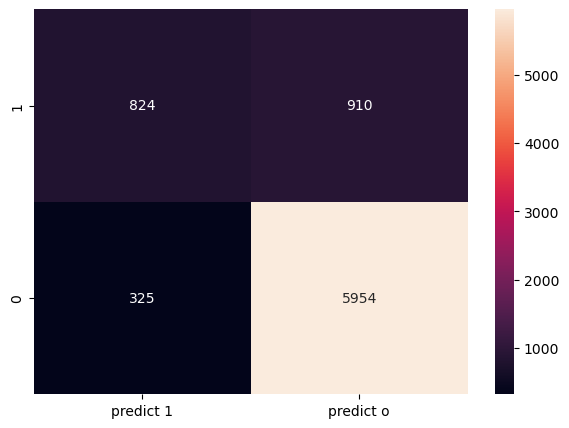

In [123]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm,index =[i for i in['1','0']],
                    columns = [i for i in['predict 1','predict o']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot = True,fmt='g')